In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('countries_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Germany,27
1,Germany,Italy,26
2,Austria,Germany,11
3,Germany,Spain,1
4,France,Spain,1
...,...,...,...
77,Germany,Norway,6
78,Greece,Italy,3
79,Italy,Japan,6
80,India,Lebanon,2


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

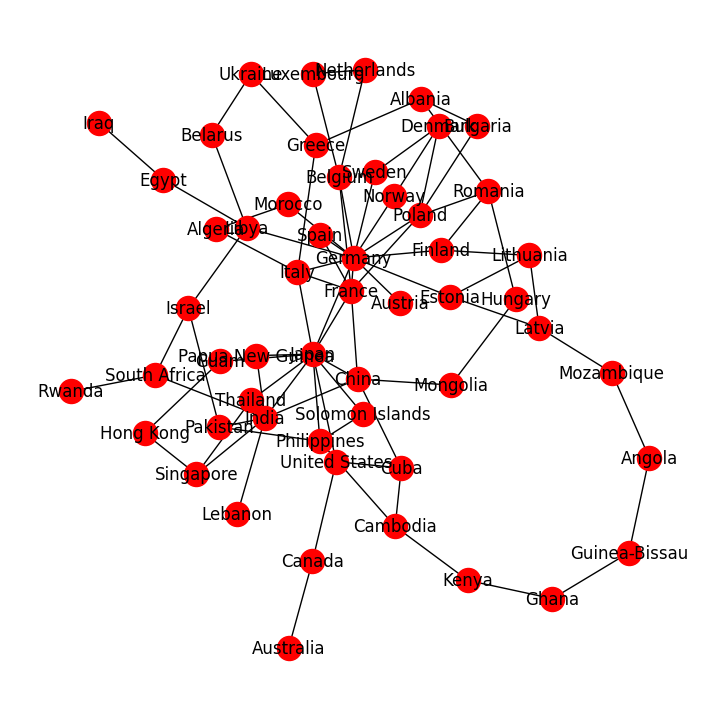

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_countries.png')

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com

defaultdict(list,
            {'Japan': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Hong Kong': [0],
             'Guam': [0],
             'Solomon Islands': [0],
             'Philippines': [0],
             'India': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South Africa': [0],
             'Papua New Guinea': [0],
             'Rwanda': [0],
             'Lebanon': [0],
             'France': [1],
             'Germany': [1],
             'Italy': [1],
             'Austria': [1],
             'Spain': [1],
             'Poland': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Morocco': [1],
             'Algeria': [1],
             'Albania': [2],
             'Greece': [2],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Bulgaria': [2],
             'Est

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com

{'Japan': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Hong Kong': 0,
 'Guam': 0,
 'Solomon Islands': 0,
 'Philippines': 0,
 'India': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South Africa': 0,
 'Papua New Guinea': 0,
 'Rwanda': 0,
 'Lebanon': 0,
 'France': 1,
 'Germany': 1,
 'Italy': 1,
 'Austria': 1,
 'Spain': 1,
 'Poland': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Albania': 2,
 'Greece': 2,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Bulgaria': 2,
 'Estonia': 3,
 'Latvia': 3,
 'Lithuania': 3,
 'Finland': 3,
 'Romania': 3,
 'Hungary': 3,
 'Cambodia': 4,
 'Kenya': 4,
 'Ghana': 4,
 'Guinea-Bissau': 4,
 'Angola': 4,
 'Mozambique': 4,
 'China': 5,
 'Mongolia': 5,
 'Cuba': 5,
 'United States': 5,
 'Canada': 5,
 'Australia': 5,
 'Belgium': 6,
 'Netherlands': 6,
 'Luxembourg': 6}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The connections seem to make sense. Another observation is that at least to some degree geographical proximity is visible here.

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.1320754716981132,
 'Germany': 0.24528301886792453,
 'Italy': 0.09433962264150943,
 'Austria': 0.018867924528301886,
 'Spain': 0.03773584905660377,
 'Poland': 0.09433962264150943,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.05660377358490566,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.05660377358490566,
 'Denmark': 0.05660377358490566,
 'Norway': 0.03773584905660377,
 'Sweden': 0.03773584905660377,
 'Belgium': 0.07547169811320754,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Albania': 0.05660377358490566,
 'Greece': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.20754716981132074,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'China': 0.09433962264150943,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.05660377358490566,
 'Hong Kong': 0.03773584905660377,
 'Guam': 0.03773

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

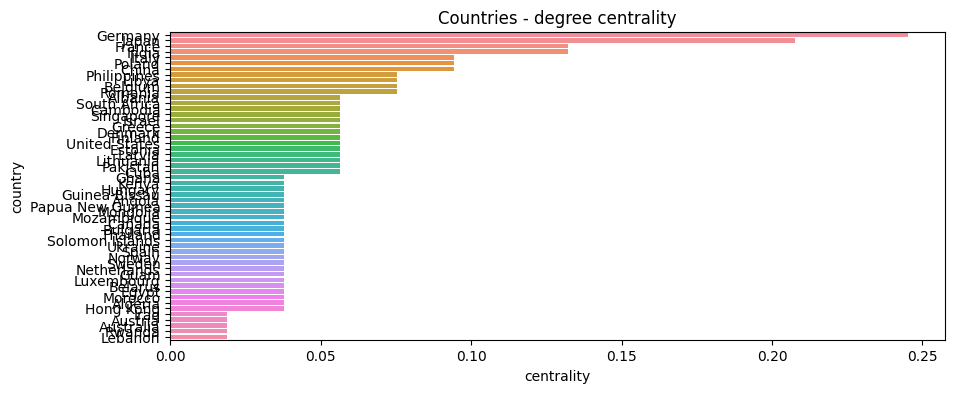

In [18]:
# Plot the degree centrality

plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("Countries - degree centrality")

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [20]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

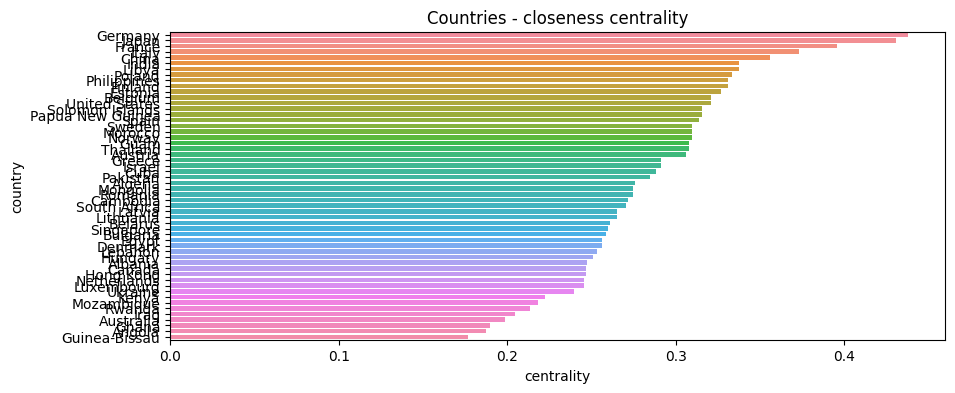

In [21]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("Countries - closeness centrality")

In [22]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [23]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

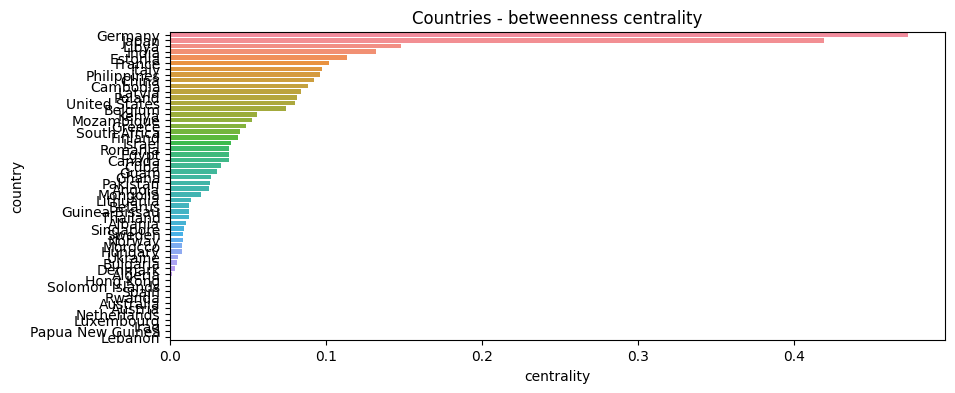

In [24]:
plt.figure(figsize = (10, 4))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweennes_df).set_title("Countries - betweenness centrality")

In [25]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

It seems like the countries are in similar order for all three centrality measures.